<div style="border:solid green 2px; padding: 20px">
<b>Наталья, привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Критическая ошибка: ❌</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Хорошо, но можно и лучше: ❗️</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Все отлично: ✅</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

<div class="alert alert-info">
Привет!
Меня зовут Наташа. На ты общаться удобно)
Про выделение комментариев поняла.
</div>

# Исследование данных о продажах компьютерных игр


Из открытых источников нам доступны исторические данные о продажах игр до 2016 года, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    
**Исследование пройдёт в несколько этапов:**

- **Обзор данных** - изучим общую информацию, просмотрим каждый столбец датафрейма;
    
- **Предобработка данных** - удалим аномалии, заполним пропуски (где это возможно);
    
- **Исследовательский анализ данных:**
    
•	Посмотрим, сколько игр выпускалось в разные годы.
    
•	Посмотрим, как менялись продажи по платформам.
    
•	Выберем несколько потенциально прибыльных платформ.
    
•	Построим графики для оценки глобальных продаж игр в разбивке по платформам. 
    
•	Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 
    
•	Соотнесем выводы с продажами игр на других платформах.
    
•	Посмотрим на общее распределение игр по жанрам. 
    
• Составим портрет пользователя каждого региона

    
- **Проверим следующие гипотезы:**

•	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

•	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться в концепции / деталях работы. Можно также привести краткий план проведения самой работы и описание используемых столбцов. 

</div>

### Общая информация 

In [261]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [262]:
df = pd.read_csv('/datasets/games.csv')

In [263]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В информации о датасете мы видим, что в данных есть пропуски, обработкой столбцов с пропусками мы займемся далее.

Также необходимо изменить тип данных в столбцах с датой выпуска игры и оценкой пользвателя.

### Подготовка данных

На данном этапе мы подготовим данные для дальнейшего исследования. Приведем названия к корректному виду, обработаем пропуски, преобразуем данные в нужные типы. Также создадим отдельный столбец с суммарными продажами по всем регионам.

In [265]:
df = df.rename(columns={'Name':'name','Platform': 'platform', 'Year_of_Release': 'year_of_release','Genre':'genre', 'NA_sales':'na_sales','EU_sales':'eu_sales','JP_sales':'jp_sales', 'Other_sales':'other_sales','Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating' }) #приведем названия столбцов к нижнему регистру

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Отличный и безопасный способ заменить регистр в наших данных 👍
    
Мы также можем использовать метод `df.columns.str.lower()`
</div>

Посмотрим на уникальные значения в столбцах, в которых планируем смену типа данных.

In [266]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [267]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце с рейтингом пользователей есть значение "tbd", вероятнее всего оно относится к играм, которые еще не получили оценки. Заменим данное значение на Nan, чтобы в дальнейшем была возможность изменить тип данных на числовой.

In [268]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

In [269]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [270]:
df['year_of_release']= df['year_of_release'].astype('Int64')
df['user_score']=df['user_score'].astype('float')

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

В том числе метод `fillna` и `astype` можно применять к нескольким столбцам одновременно.
    
Если столбцов более 2–ух, то рекомендую применять цикл `for`.
    
Пример: 
    
`df.astype({ "col1": "float64", "col2": "int64"})`
    
</div>

На данном этапе мы заменили типы данных в колонках с годом выпуска игры (на тип int), а также в колонке с рейтингом пользователей на числовой тип. Это позволит нам в дальнейшем использовать данные для анализа. Теперь займемся пропусками. 

In [271]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Пропущенные данные есть в столбцах с названием игры, годом выпуска, жанром, оценкой критиков, рейтингом и оценкой пользователя.

#### name, year_of_release, genre 

Доля пропусков в данных столбцах менее 5% и для экономии времени их можно удалить. Вероятнее всего пропуски возникли в результате человеческого фактора (забыли внести при заполнении).

In [272]:
df.dropna(subset = ['name', 'year_of_release', 'genre'], inplace = True)

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

Я бы рекомендовал не использовать атрибут `inplace`, так как в последующих обновлениях библотеки `pandas` он будет удален.
    
Лучше всего переопределять переменные. 
    
</div>

#### critic_score, user_score,  rating       

В данных столбцах большое количество пропусков. Пропуски в оценках могли возникнуть из-за их отсутствия (например, если игра вышла недавно). Заполнять средним или медианным значением, по моему мнению, не совсем корректно, т.к. это может создать лишний "шум" в данных и исказить дальнейшее исследование. Оставим пропуски без изменений.
Пропуски в рейтинге могли возникнуть из-за человеческого фактора, а также из-за того, что рейтинг конкретной игре не присвоен. Заполним пропуски значением "unknow".

In [273]:
df['rating'] = df['rating'].fillna('unknow') 

In [274]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Еще раз проверим наличие пропусков - мы видим, что пропуски остались в столбцах с оценками, датафрейм подготовлен к анализу. 

Далее рассчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

#### Суммарные продажи по регионам

Для того, чтобы посчитать суммарные продажи по регионам, создадим новый столбец sales_sum

In [275]:
df['sales_sum'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Кстати мы можем применить метод `sum(axis=1)` к суммируемым столбцам.
    
`df[['col1', 'col2', 'col3']].sum(axis=1)`
</div>

In [276]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknow,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknow,31.38


**Вывод:**

На данном этапе мы провели предобработку данных. Изменили типы данных в столбцах с оценкой пользователя и датой выпуска игры. Удалили пропущенные значения в колонках с названием игры, жанром и годом выпуска (т.к. количество пропусков было небольшим), пропуски в колонках с оценками оставили без изменений,  в колонке с рейтингом заменили на значение "unknow". Также был добавлен столбец с суммарными продажами по каждой игре, эти данные понадобятся нам на следующих шагах.

### Исследовательский анализ данных

 На данном этапе мы:
 
• Посмотрим, сколько игр выпускалось в разные годы.

• Посмотрим, как менялись продажи по платформам.

• Выберем несколько потенциально прибыльных платформ.

• Построим графики для оценки глобальных продаж игр в разбивке по платформам.

• Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

• Соотнесем выводы с продажами игр на других платформах.

• Посмотрим на общее распределение игр по жанрам.



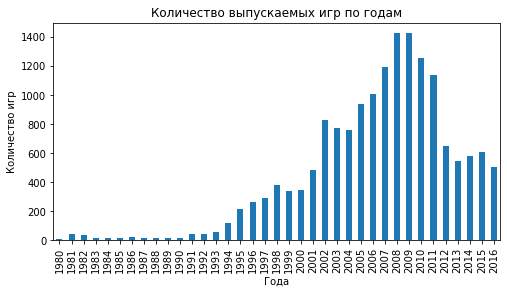

''

In [277]:
df_year = df.groupby('year_of_release')['name'].count()#посчитаем количество выпускаемых игр по годам
df_year.plot(kind='bar', figsize=(8,4))
plt.title('Количество выпускаемых игр по годам')
plt.ylabel('Количество игр')
plt.xlabel('Года')
plt.show()#построим гистограмму выпускаемых игр по годам
;

Датафрейм содержит данные за достаточно длительный период. Пик количества выпускаемых игр наблюдается с 2002 года. 
<div class="alert alert-info"> На графике мы видим, что с 2012 наметился новый падающий тренд, который продолжается по текущий момент. Проанализируем данные с момента спада продаж (2012-2016г.).</div>

Далее найдем платформы с самыми большими объемами продаж в указанные годы.

<div class="alert alert-danger">
<b>Комментарий ревьюера: ❌</b>

<s>Давай также визуализируем подобные расчеты по всему проекту (которые относятся к основному заданию), ведь на графике информацию воспринимать гораздо лучше, чем в таблице.    
</div>

<div class="alert alert-info">
Добавила визуализацию
</div>

In [278]:
df_1216 = df.query("2012 <= year_of_release <= 2016") #сформируем выгрузку по выбранным годам

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

<s>Почему именно за этот период выбрали выборку ? 
    
</div>

<div class="alert alert-info"> Ответила выше: 
    
    На графике мы видим, что с 2012 наметился новый падающий тренд, который продолжается по текущий момент. Проанализируем данные с момента спада продаж (2012-2016г.).

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

👍
    
</div>

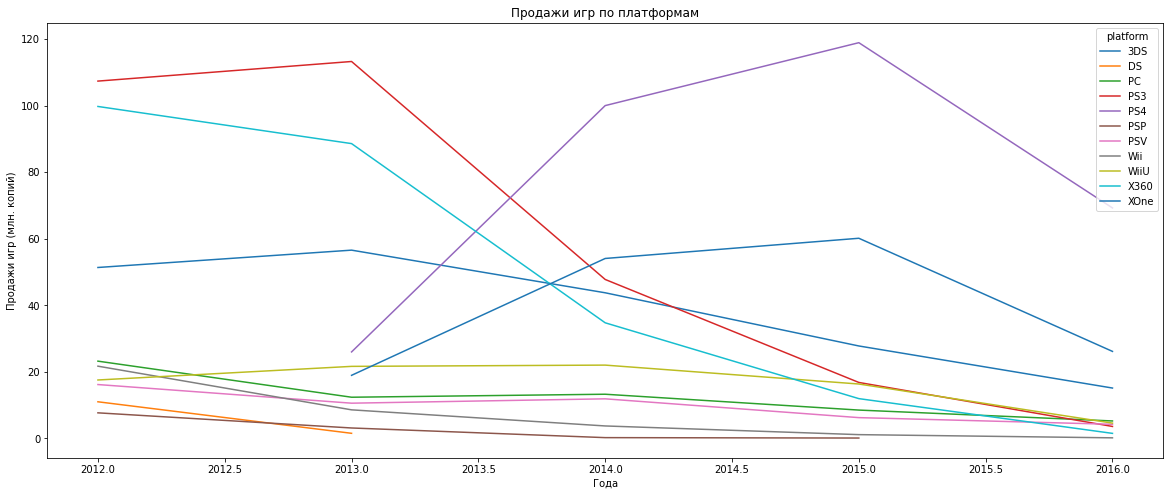

''

In [279]:
df_1216.pivot_table(index='year_of_release', columns = 'platform', values='sales_sum', aggfunc='sum').plot(figsize = (20, 8)) #построим график распределения объемов продаж по платформам и годам
plt.title('Продажи игр по платформам')
plt.ylabel('Продажи игр (млн. копий)')
plt.xlabel('Года')
plt.show()
;

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

<s>Не забывай пожалуйста подписывать каждый график.
    
Это важный момент всего проекта, так быстрее понять о чем идёт речь на графике.
    
</div>

<div class="alert alert-info">
Спасибо, добавила!

</div>


На графике виден жизненный цикл платформы. В среднем, он составляет не более 5 лет. При этом можно выделить 3 наиболее крупных платформы, которые к концу 2016 года все еще сохраняют объемы продаж на высоком уровне - PS4, XOne и 3DS. Сформируем таблицу с объемом продаж по платформам.

In [280]:
df_1216.groupby(['platform'])['sales_sum'].sum()

platform
3DS     194.61
DS       12.55
PC       62.65
PS3     288.79
PS4     314.14
PSP      11.19
PSV      49.18
Wii      35.37
WiiU     82.19
X360    236.54
XOne    159.32
Name: sales_sum, dtype: float64

В данной выгрузке мы также видим, что по объемам продаж лидируют указанные платформы. Также высокий объем продаж показывает платформа PS3, но на графике выше мы видим, что к концу 2016 года платформа уже утратила свою актуальность (связано с выходом новой версии платформы). Обновим датафрейм, оставив данные по трем крупнейшим платформам.

In [281]:
df_1216 = df_1216.query("platform == ['XOne', 'PS4', '3DS']") 
df_1216

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknow,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknow,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknow,11.68
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
...,...,...,...,...,...,...,...,...,...,...,...,...
16648,Mushi Bugyou,3DS,2013,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknow,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,unknow,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknow,0.01
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01


На графике и в таблице мы видим, что пик продаж по выбранным платформам пришелся на 2015 год, при этом к 2016 году продажи значительно снизились. Для прогноза на 2017 год логично будет взять 4 предшествующих года, чтобы учесть устаревание платформ, но и не отсеять нужные данные (как в случае с PS3). Посмотрим более подробную информацию по крупнейшим платформам в выбранный период.

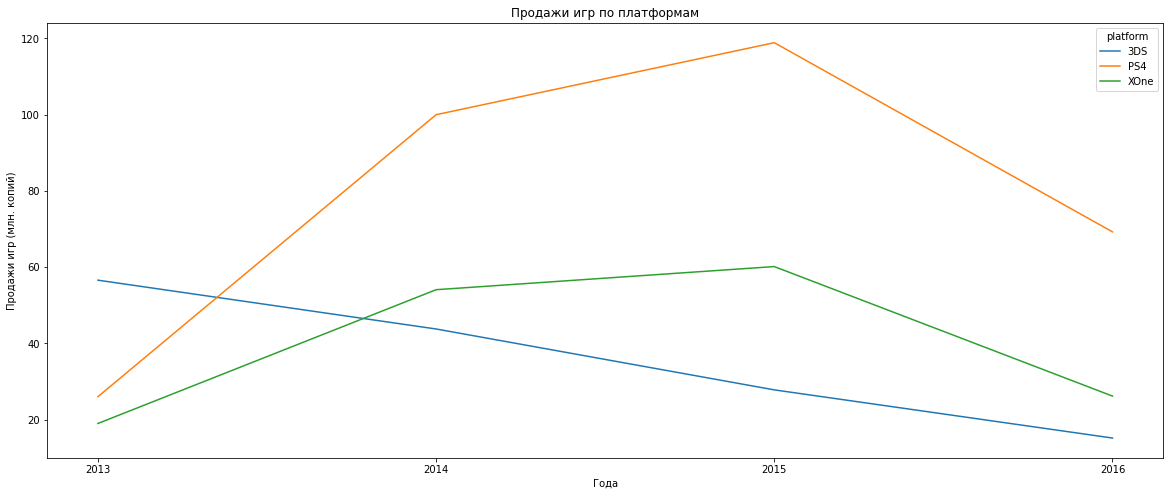

''

In [282]:
df_1316 = df_1216.query("2013 <= year_of_release <= 2016") #сформируем выгрузку по выбранным годам
df_1316.pivot_table(index='year_of_release', columns = 'platform', values='sales_sum', aggfunc='sum').plot(figsize = (20, 8))
;
plt.title('Продажи игр по платформам')
plt.ylabel('Продажи игр (млн. копий)')
plt.xlabel('Года')
plt.xticks([2013, 2014, 2015, 2016])
plt.show()
;

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Кстати для того чтобы подписать график мы можем использовать метод `plt.title()` и в конце кода применить `plt.show()`
</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

<s>У нас также съехали подписи оси X, рекомендую поправить этот момент с помощью метода `plt.xticks`.   
</div>

<div class="alert alert-info">
Поправила!
</div>


По всем крупнейшим платформам наблюдается снижение объема продаж. При этом платформа PS4 наиболее прибыльная, т.к. к концу 2016г по ней все еще сохраняется достаточно высокий объем продаж. Платформы XOne и 3DS показывают себя хуже, но т.к. объем продаж по ним свыше 10 миллионов, оставим данные платформы для дальнейшего исследования, как потенциально прибыльные в 2017 году.

 Построим "ящик с усами" по глобальным продажам игр в разбивке по платформам.

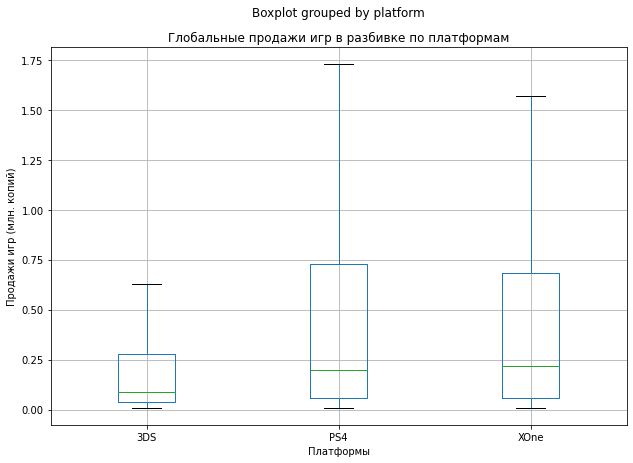

''

In [283]:
df_1316.boxplot(column='sales_sum', by='platform', figsize = (10,7), showfliers = False)
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.ylabel('Продажи игр (млн. копий)')
plt.xlabel('Платформы')
plt.show()
;

<div class="alert alert-danger">
<b>Комментарий ревьюера: ❌</b>

<s>Если график сделать побольше, то он станет более читабельным.
    
На таких графиках рекомендую также смотреть данные без выбросов, так мы можем отследить дополнительные инсайты.
    
</div>

<div class="alert alert-info">
Выбросы убрала, график увеличила

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Чтобы увеличить сам график, можно использовать метод `plt.figure(figsize=(10,7))` или если используешь методы библиотеки `pandas`, в основном всегда есть атрибут `figsize=(10,7)`, который также поможет настроить ширину и высоту графика.
    
</div>

На данном графике видны игры, значительно превосходящие по объему продаж средние показатели. При этом специфика данных не исключает того, что какие-то из игр могли быть значительно более популярны, нежели в среднем. Посмотрим, какие игры были самыми успешными на данных платформах.

In [284]:
df_1316.pivot_table(index='name', values='sales_sum').sort_values('sales_sum', ascending = False).head(10)

,sales_sum
name,
Pokemon X/Pokemon Y,14.600
Pokemon Omega Ruby/Pokemon Alpha Sapphire,11.680
Call of Duty: Black Ops 3,11.010
Grand Theft Auto V,9.045
Super Smash Bros. for Wii U and 3DS,7.550
Pokemon Sun/Moon,7.140
Call of Duty: Advanced Warfare,6.460
FIFA 16,5.915
Star Wars Battlefront (2015),5.820


Далее оценим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Для анализа возьмем наиболее крупную платформу - PS4.

In [285]:
df_ps4 = df_1316.query("platform == 'PS4'") #создадим датафрейм для исследования

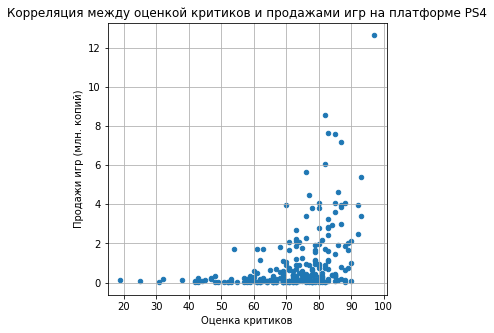

Коэффициент корреляции - Оценка критиков:  0.406567902061781


In [286]:
df_ps4.plot.scatter(x='critic_score', y='sales_sum', figsize=(5, 5), sharex=False, grid=True)
plt.title('Корреляция между оценкой критиков и продажами игр на платформе PS4')
plt.ylabel('Продажи игр (млн. копий)')
plt.xlabel('Оценка критиков')
plt.show()
print('Коэффициент корреляции - Оценка критиков: ', df_ps4['sales_sum'].corr(df_ps4['critic_score']))

<div class="alert alert-danger">
<b>Комментарий ревьюера: ❌</b>

<s>Давай все таки подпишем каждый график и тем самым сделаем наш проект еще презентабельнее.
</div>

<div class="alert alert-info">
Готово
</div>


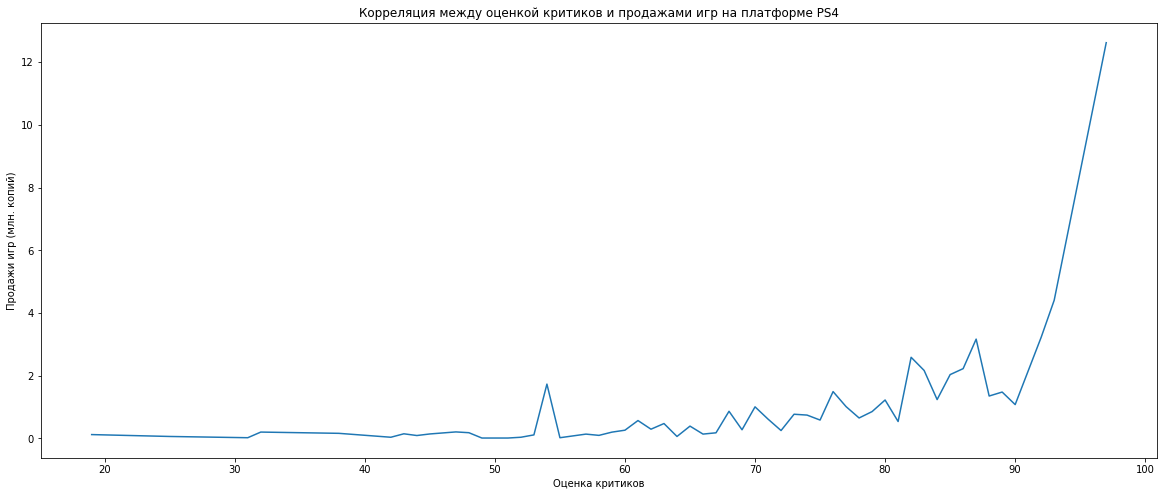

''

In [287]:
df_ps4.groupby('critic_score')['sales_sum'].mean().plot(figsize = (20, 8))
plt.title('Корреляция между оценкой критиков и продажами игр на платформе PS4')
plt.ylabel('Продажи игр (млн. копий)')
plt.xlabel('Оценка критиков')
plt.show()
;

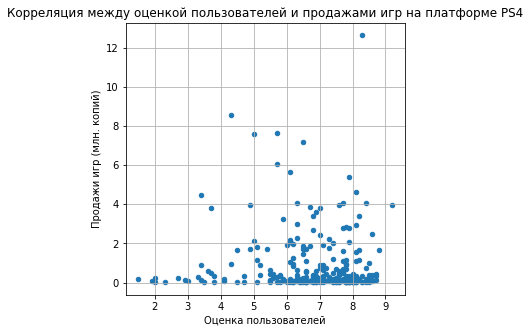

Коэффициент корреляции - Оценка пользователей:  -0.031957110204556376


In [288]:
df_ps4.plot.scatter(x='user_score', y='sales_sum', figsize=(5, 5), sharex=False, grid=True)
plt.title('Корреляция между оценкой пользователей и продажами игр на платформе PS4')
plt.ylabel('Продажи игр (млн. копий)')
plt.xlabel('Оценка пользователей')
plt.show()
print('Коэффициент корреляции - Оценка пользователей: ', df_ps4['sales_sum'].corr(df_ps4['user_score']))

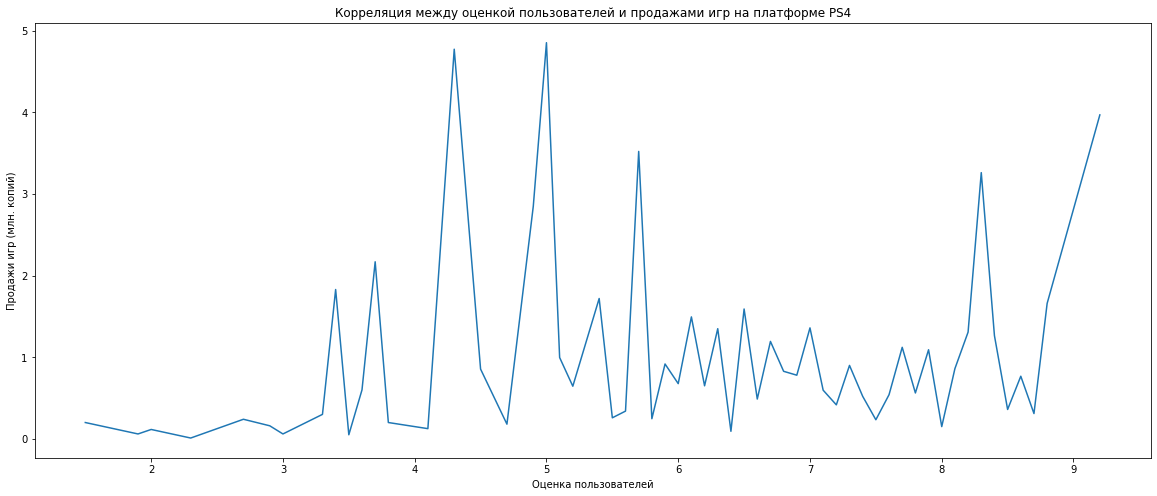

''

In [289]:
df_ps4.groupby('user_score')['sales_sum'].mean().plot(figsize = (20, 8))
plt.title('Корреляция между оценкой пользователей и продажами игр на платформе PS4')
plt.ylabel('Продажи игр (млн. копий)')
plt.xlabel('Оценка пользователей')
plt.show()
;

Из полученных данных можно сделать вывод, что зависимость объема продаж от оценок критиков слабо положительная. При этом в случае высоких оценок критиков (от 90 и выше), объемы продаж резко растут.

Зависимость от оценок пользователей очень слабая и практически отсутствует. 

Проверим сделанные выводы на других платформах.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>
    
Хорошие и логичные комментарии. Очень важно строить график корреляции между переменными, ведь может произойти такая ситуация, что расчет у нас очень сильный а на графике абсолютно другая картина.
    
---

В том числе можно было построить матрицу корреляции между нужными нам переменными.
    
И визуализировать её с помощью метода `heatmap` из библиотеки `seaborn`.
    
</div>

In [290]:
df_all = df.query("2013 <= year_of_release <= 2016") #сформируем выгрузку по выбранным годам

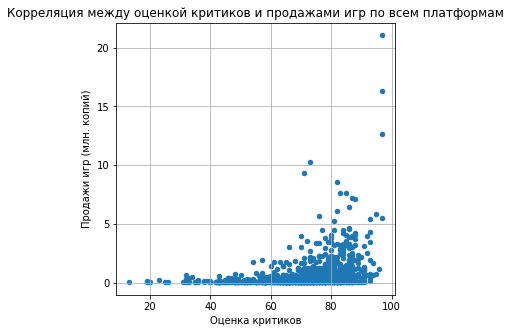

Коэффициент корреляции - Оценка критиков:  0.3136995151027371


In [291]:
df_all.plot.scatter(x='critic_score', y='sales_sum', figsize=(5, 5), sharex=False, grid=True)
plt.title('Корреляция между оценкой критиков и продажами игр по всем платформам')
plt.ylabel('Продажи игр (млн. копий)')
plt.xlabel('Оценка критиков')
plt.show()
print('Коэффициент корреляции - Оценка критиков: ', df_all['sales_sum'].corr(df_all['critic_score']))

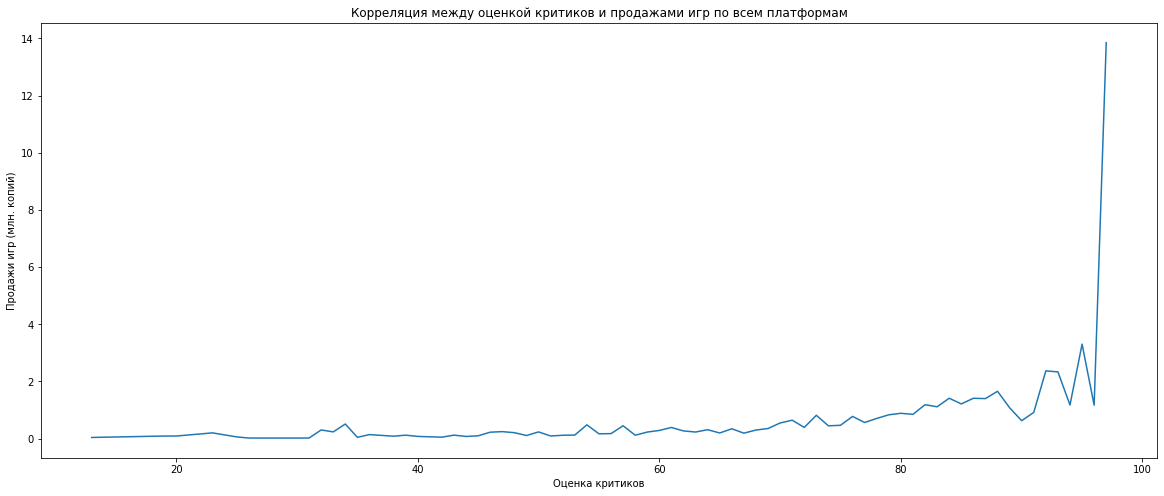

''

In [292]:
df_all.groupby('critic_score')['sales_sum'].mean().plot(figsize = (20, 8))
plt.title('Корреляция между оценкой критиков и продажами игр по всем платформам')
plt.ylabel('Продажи игр (млн. копий)')
plt.xlabel('Оценка критиков')
plt.show()
;

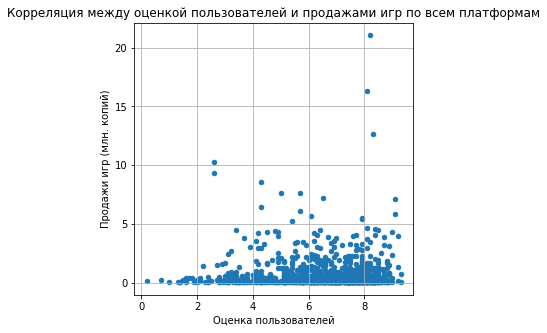

Коэффициент корреляции - Оценка пользователей:  0.3136995151027371


In [293]:
df_all.plot.scatter(x='user_score', y='sales_sum', figsize=(5, 5), sharex=False, grid=True)
plt.title('Корреляция между оценкой пользователей и продажами игр по всем платформам')
plt.ylabel('Продажи игр (млн. копий)')
plt.xlabel('Оценка пользователей')
plt.show()
print('Коэффициент корреляции - Оценка пользователей: ', df_all['sales_sum'].corr(df_all['critic_score']))

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Обрати внимание, что наши действия повторяются с точки зрения построения графиков.
    
Это говорит о том, что мы можем создать функцию, которая будет выполнять все действия за нас.
    
Тем самым мы сможем оптимизировать свой код и проект целиком.
    
</div>

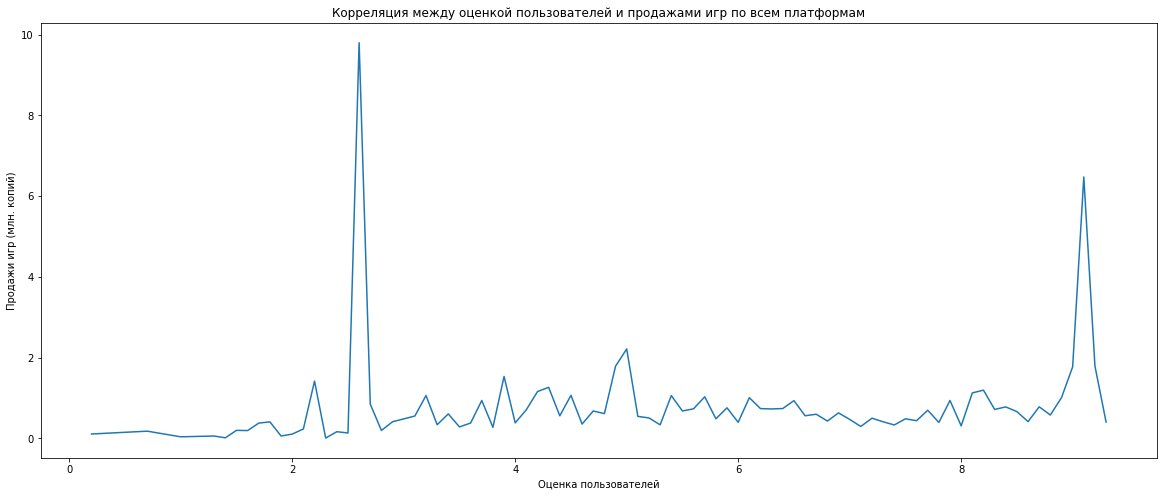

''

In [294]:
df_all.groupby('user_score')['sales_sum'].mean().plot(figsize = (20, 8))
plt.title('Корреляция между оценкой пользователей и продажами игр по всем платформам')
plt.ylabel('Продажи игр (млн. копий)')
plt.xlabel('Оценка пользователей')
plt.show()
;

Гипотеза о влиянии высоких оценок (от 90 и выше) критиков на объемы продаж подтвердилась. 

Гипотеза о том, что оценки пользователей практически не влияют на продажи, не подтверждается. Все же зависимость есть, причем, как и с оценками критиков, при оценке от 90 и выше продажи резко идут вверх. Данное расхождение может быть связано с небольшим количеством оценок по платформе PS4, относительно общего количества оценок по всем платформам, а также с тем, что по PS4 преобладали положительные оценки, тогда как при выгрузке по всем платформам, низких оценок достаточно много.

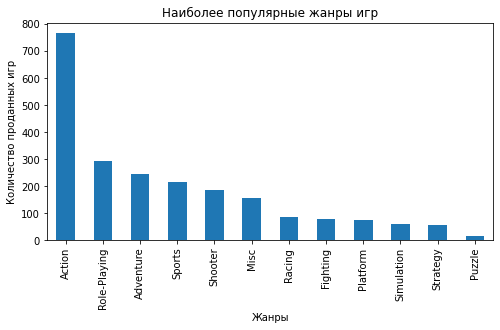

''

In [295]:
df_all['genre'].value_counts().head(15).plot(kind='bar', figsize=(8,4)) #найдем наиболее популярные жанры игр
plt.title('Наиболее популярные жанры игр')
plt.ylabel('Количество проданных игр')
plt.xlabel('Жанры')
plt.show() #построим гистограмму выпускаемых игр по жанрам
; 

<div class="alert alert-info">
Найдем наиболее прибыльные жанры игр. Для анализа этой категории игр будем использовать медианные значения сумм продаж, т.к. это более устойчивый показатель, позволяющий выявить самые стабильные жанры, которые приносят доход вне зависимости от платформы.
</div>


              sales_sum
genre                  
Shooter           0.450
Sports            0.240
Platform          0.225
Role-Playing      0.125
Fighting          0.125
Racing            0.120
Action            0.110
Simulation        0.100
Misc              0.100
Strategy          0.080
Puzzle            0.060
Adventure         0.030


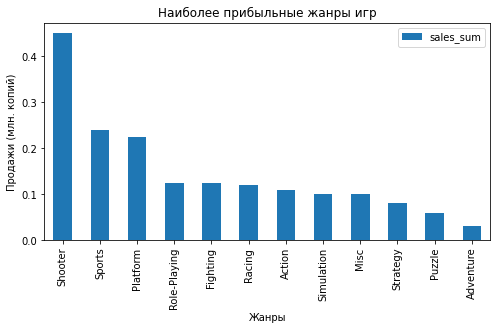

''

In [296]:
top_genre = df_all.pivot_table(index='genre', values='sales_sum', aggfunc='median')
top_genre = top_genre.sort_values('sales_sum', ascending = False)
print(top_genre)
top_genre.plot(kind='bar', figsize=(8,4))
plt.title('Наиболее прибыльные жанры игр')
plt.ylabel('Продажи (млн. копий)')
plt.xlabel('Жанры')
plt.show()#построим гистограмму выпускаемых игр по годам
;

**Вывод:**
<div class="alert alert-info">
Наиболее часто встречаемые жанры - это экшн, ролевые игры, приключения. Самые непопулярные - стратегии и паззлы. По прибыльности лидируют стрелялки и спортивные игры.
    
</div>


<div class="alert alert-danger">
<b>Комментарий ревьюера: ❌</b>

<s>А если мы посмотрим на средние значения продаж, какие выводы мы сможем сделать ? 
    
Почему на средние значения ? 
    
Т.к. эта метрика более устойчива к выбросам, чем просто суммы и количественные показатели.
    
---
    
P.s. Нам также нужно визуализировать этот расчет.
    
</div>

<div class="alert alert-info">
Исправила, решила взять не средние значения, а медианы, т.к. в данных есть большое количество выбросов.
</div>


<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

🔥    
</div>

### Портрет пользователя каждого региона

На данном шаге мы определим для пользователя каждого региона (NA, EU, JP):
-	Самые популярные платформы (топ-5). 
-	Самые популярные жанры (топ-5). 
-	Оценим влияние рейтинга ESRB на продажи в каждом регионе


In [297]:
platform_na = df_all.groupby(['platform'])['na_sales'].sum().sort_values(ascending=False).head()#топ платформ в Северной Америке   

genre_na = df_all.pivot_table(index='genre', values='na_sales', aggfunc='median')
genre_na = genre_na.sort_values('na_sales', ascending = False)#топ жанров в Северной Америке (оценка по медианным значениям)

rating_na = df_all.groupby(['rating'])['na_sales'].sum().sort_values(ascending=False).head()#топ игр по возрастной категории в Северной Америке

print(platform_na)
print(genre_na)
print(rating_na)

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64
              na_sales
genre                 
Shooter          0.200
Platform         0.090
Sports           0.080
Fighting         0.045
Racing           0.030
Action           0.020
Role-Playing     0.020
Misc             0.010
Adventure        0.000
Puzzle           0.000
Simulation       0.000
Strategy         0.000
rating
M         165.21
unknow     89.42
E          79.05
E10+       54.24
T          49.79
Name: na_sales, dtype: float64


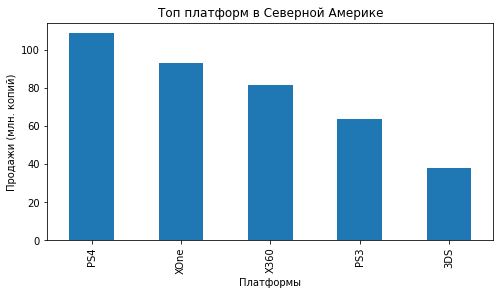

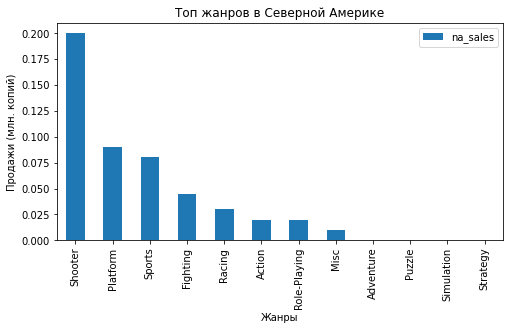

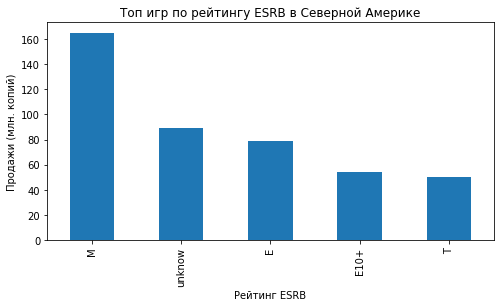

''

In [298]:
platform_na.plot(kind='bar', figsize=(8,4))
plt.title('Топ платформ в Северной Америке')
plt.ylabel('Продажи (млн. копий)')
plt.xlabel('Платформы')
plt.show()#построим гистограмму самых популярных платформ Северной Америки

genre_na.plot(kind='bar', figsize=(8,4))
plt.title('Топ жанров в Северной Америке')
plt.ylabel('Продажи (млн. копий)')
plt.xlabel('Жанры')
plt.show()#построим гистограмму самых популярных жанров Северной Америки

rating_na.plot(kind='bar', figsize=(8,4))
plt.title('Топ игр по рейтингу ESRB в Северной Америке')
plt.ylabel('Продажи (млн. копий)')
plt.xlabel('Рейтинг ESRB')
plt.show()#построим гистограмму самых популярных игр по рейтингу ESRB в Северной Америке
;

В Северной Америке по популярности лидируют платформы PS4 и XOne. Наиболее популярными жанрами являются стрелялки и платформеры. Чаще всего игры покупают взрослые люди (рейтинг М).

In [304]:
platform_eu = df_all.groupby(['platform'])['eu_sales'].sum().sort_values(ascending=False).head()#топ платформ в Европе

genre_eu = df_all.pivot_table(index='genre', values='eu_sales', aggfunc='median')
genre_eu = genre_eu.sort_values('eu_sales', ascending = False)#топ жанров в Европе (оценка по медианным значениям)

rating_eu = df_all.groupby(['rating'])['eu_sales'].sum().sort_values(ascending=False).head()#топ игр по возрастной категории в Европе

print(platform_eu)
print(genre_eu)
print(rating_eu)

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64
              eu_sales
genre                 
Shooter          0.190
Platform         0.080
Racing           0.060
Sports           0.050
Simulation       0.035
Strategy         0.025
Action           0.020
Fighting         0.020
Misc             0.010
Role-Playing     0.010
Adventure        0.000
Puzzle           0.000
rating
M         145.32
E          83.36
unknow     78.91
E10+       42.69
T          41.95
Name: eu_sales, dtype: float64


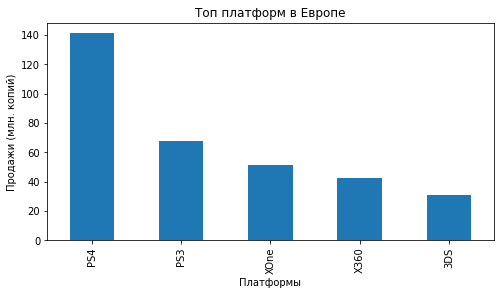

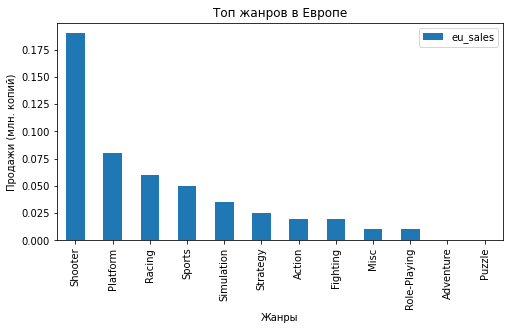

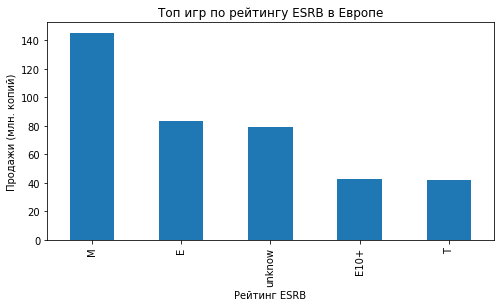

''

In [305]:
platform_eu.plot(kind='bar', figsize=(8,4))
plt.title('Топ платформ в Европе')
plt.ylabel('Продажи (млн. копий)')
plt.xlabel('Платформы')
plt.show()#построим гистограмму самых популярных платформ Европе

genre_eu.plot(kind='bar', figsize=(8,4))
plt.title('Топ жанров в Европе')
plt.ylabel('Продажи (млн. копий)')
plt.xlabel('Жанры')
plt.show()#построим гистограмму самых популярных жанров Европе

rating_eu.plot(kind='bar', figsize=(8,4))
plt.title('Топ игр по рейтингу ESRB в Европе')
plt.ylabel('Продажи (млн. копий)')
plt.xlabel('Рейтинг ESRB')
plt.show()#построим гистограмму самых популярных игр по рейтингу ESRB в Европе
;

В Европе лидируют платформы PS4 и PS3. С жанрами ситуация аналогична Америке - лидеры - Стрелялки и платформеры. Чаще, как и в Америке, покупают игры для взрослых.

In [306]:
platform_jp = df_all.groupby(['platform'])['jp_sales'].sum().sort_values(ascending=False).head()#топ платформ в Японии

genre_jp = df_all.pivot_table(index='genre', values='jp_sales', aggfunc='median')
genre_jp = genre_jp.sort_values('jp_sales', ascending = False)#топ жанров в Японии (оценка по медианным значениям)

rating_jp = df_all.groupby(['rating'])['jp_sales'].sum().sort_values(ascending=False).head()#топ игр по возрастной категории в Японии

print(platform_jp)
print(genre_jp)
print(rating_jp)

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64
              jp_sales
genre                 
Role-Playing      0.05
Fighting          0.03
Misc              0.02
Puzzle            0.02
Action            0.01
Adventure         0.01
Platform          0.00
Racing            0.00
Shooter           0.00
Simulation        0.00
Sports            0.00
Strategy          0.00
rating
unknow    85.05
T         20.59
E         15.14
M         14.11
E10+       5.89
Name: jp_sales, dtype: float64


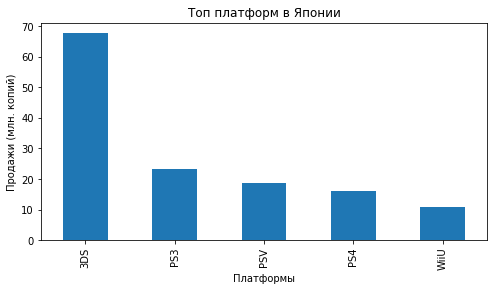

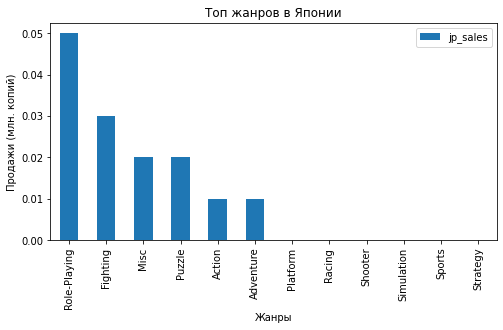

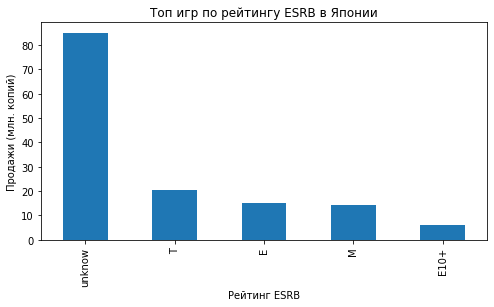

''

In [307]:
platform_jp.plot(kind='bar', figsize=(8,4))
plt.title('Топ платформ в Японии')
plt.ylabel('Продажи (млн. копий)')
plt.xlabel('Платформы')
plt.show()#построим гистограмму самых популярных платформ Европе

genre_jp.plot(kind='bar', figsize=(8,4))
plt.title('Топ жанров в Японии')
plt.ylabel('Продажи (млн. копий)')
plt.xlabel('Жанры')
plt.show()#построим гистограмму самых популярных жанров Европе

rating_jp.plot(kind='bar', figsize=(8,4))
plt.title('Топ игр по рейтингу ESRB в Японии')
plt.ylabel('Продажи (млн. копий)')
plt.xlabel('Рейтинг ESRB')
plt.show()#построим гистограмму самых популярных игр по рейтингу ESRB в Европе
;

В Японии ситуация отличается - лидируют платформы 3DS и PS3. Жанры - ролевые игры и бои. Посмотрим, какую долю занимает каждый регион в сумме продаж. В игры чаще играют подростки (рейтинг Т).

In [99]:
platform_all = df_all['sales_sum'].sum() #для подсчета процентного соотношения продаж по регионам создадим переменную с общей суммой продаж
platform_all

1090.69

In [100]:
percent_na = df_all['na_sales'].sum()/platform_all*100 #доля продаж в Северной Америке
percent_na.round()

40.0

In [101]:
percent_eu = df_all['eu_sales'].sum()/platform_all*100 #доля продаж в Европе
percent_eu.round()

36.0

In [102]:
percent_jp = df_all['jp_sales'].sum()/platform_all*100 #доля продаж в Японии
percent_jp.round()

13.0

''

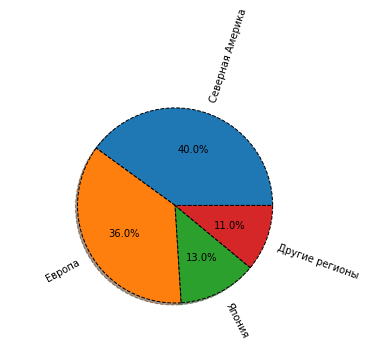

In [189]:
share  = [40, 36, 13, 11]
labels  = ["Северная Америка", "Европа", "Япония", "Другие регионы"]
fig, ax = plt.subplots()
ax.pie(share, labels=labels, autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")
;

**Вывод:**

Мы видим, что основной оборот приходится на Америку и Европу. Доля Японии значительно меньше - 13%. Это может быть связано в том числе и с тем, что в Японии наиболее популярны устаревшие платформы, продажи игр для которых находятся на невысоком уровне в выбранном периоде. Кроме того, т.к. в Японии чаще покупают игры подростки, возможно, они тратят меньшие суммы, чем взрослые люди.

<div class="alert alert-danger">
<b>Комментарий ревьюера: ❌</b>

<s>Портреты также нужно нам отобразить на графиках.
    
</div>

<div class="alert alert-info">
Я добавила визуализацию, также пересмотрела данные по самым популярным жанрам - как и выше, сделала топ по 
медианным значениям - рейтинг изменился.
</div>


<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Достаточно детально проанализировали наши данные и изучили портреты пользователей.
    

    
Давай теперь проверим наши гипотезы.
    
</div>

### Провека гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Начнем с проверки первой гипотезы. Нулевая гипотеза звучит так:

- Н0 = Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Исходя из Н0 формулируем альтернативную гипотезу Н1:
- Н1 = Средние пользовательские рейтинги платформ Xbox One и PC разные

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Гипотезы сформулированы верно.
    
    
**Best practices:**
    
Перед проверкой гипотезы рекомендую проверить дисперсии выборок, чтобы корректно определить атрибут `equal_val` в Т–тесте.
    
В том числе стоит визуализировать распределение каждой выборки, чтобы определить нормальное ли у них распределение или нет.
    
Так мы покажем логичность и последовательность наших действий.
    
</div>

In [103]:
df_all = df_all.dropna(subset=['user_score']) 
df_xbox = df_all[df_all['platform'] == 'XOne']
df_pc =  df_all[df_all['platform'] == 'PS4'] #подготовим выборки для анализа
user_score_xbox = df_xbox['user_score']
user_score_pc = df_pc['user_score']
alpha = .05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    user_score_xbox, 
    user_score_pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.10169342039498884
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу мы не отвергаем, следовательно, можно сделать вывод, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

#### Средние пользовательские рейтинги жанров Action и Sports разные.

Проверим вторую гипотезу - средние пользовательские рейтинги жанров Action и Sports разные.

- Н0 в этом случае = средние пользовательские рейтинги жанров Action и Sports одинаковые
- Н1 = средние пользовательские рейтинги жанров Action и Sports разные

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Гипотезы сформулированы верно.
    
       
</div>

In [104]:
df_action = df_all[df_all['genre'] == 'Action']
df_sports =  df_all[df_all['genre'] == 'Sports'] #подготовим выборки для анализа
user_score_action = df_action['user_score']
user_score_sports = df_sports['user_score']
alpha = .05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    user_score_xbox, 
    user_score_pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.10169342039498884
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не получилось, следовательно, мы делаем вывод, что средние пользовательские рейтинги жанров Action и Sports разные.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Обрати внимание, что наши действия также повторяются с точки зрения расчетов статистических тестов, это говорит о том, что мы можем также создать здесь функцию 😊
    
</div>

### Вывод

В ходе исследования мы проанализировали датафрейм с информацией о продажах компьютерных игр за период с 1980 по 2016 год. 
В начале исследования нами был подготовлена информация к дальнейшему анализу - удалены пропущенные значения в колонках с названием игры, жанром и годом выпуска (т.к. количество пропусков было небольшим), пропуски в колонках с оценками оставлены без изменений, в колонке с рейтингом заменены на значение "unknow". 

Далее мы посмотрели на динамику продаж игр по годам, а также на жизненный цикл платформы, который составляет не более 5 лет. Было принято решение использовать для анализа информацию за период с 2013 по 2016 годы, чтобы не захватить данные по уже устаревшим платформам, но и не отсеять лишнее.

Нами были выделены наиболее крупные платформы, на которые стоит сделать акцент при планировании рекламной кампании на 2017 год – это платформы PS4, XOne и 3DS. По ним, к концу 2016 года объем продаж сохраняется на высоком уровне.
Также было выяснено, что есть зависимость объема продаж от оценок критиков. Особенно высоки продажи игр с оценками от 90 и выше. Следовательно, данный момент стоит учитывать при планировании продаж на 2017 год. То же самое можно сказать и об оценках пользователей.
<div class="alert alert-info">
Мы выявили самые популярные и самые прибыльные жанры компьютерных игр. Наиболее часто встречаемые жанры - это экшн, ролевые игры, приключения. Самые непопулярные - стратегии и паззлы. По прибыльности лидируют стрелялки и спортивные игры.
</div>
Основной оборот продаж игр приходится на Америку и Европу. Доля Японии значительно меньше - 13%. Это может быть связано в том числе и с тем, что в Японии наиболее популярны устаревшие платформы, продажи игр для которых находятся на невысоком уровне в выбранном периоде. Кроме того, т.к. в Японии чаще покупают игры подростки, возможно, они тратят меньшие суммы, чем взрослые люди.

В ходе исследования мы проверили 2 гипотезы и пришли к следующим выводам:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports разные.

Резюмируя, можно сказать следующее – при планировании рекламной кампании на 2017 год стоит уделить большее внимание играм для взрослых людей в жанрах стрелялки и платформеры для платформ PS4, XOne и 3DS. При этом не стоит забывать и о таком регионе, как Япония, и оставить в ассортименте игры для подростков и для платфомы PS3 (в меньшем количестве, чем указанные выше). Данная платформа все еще сохраняет свою актуальность во всех регионах, поэтому совсем отказываться от нее не стоит.


<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>


    
Достаточно детально проделанная работа и это не может не радовать 😊
    
Давай поправим мои комментарии и будем двигаться дальше.
    
Если у тебя вдруг есчть какие–либо вопросы, то я с радостью отвечу на них 😊
       

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
    
    
    
**[общий комментарий]** Ячейки **markdown** в том числе мы можем использовать как дополнительный способ стилизации нашего проекта. Оставил ниже ссылку, с примерами стилизации.

https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet     
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

Рад, что в целом все понятно и особенно здорово, что сразу применяешь новые знания на практике, ведь так они гораздо быстрее усвоятся. Тогда предлагаю двигаться дальше.
    
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊
    
    
</div>